#MD SOHAIL ANSARI
###SC23M008
###MA644 Advanced Machine Learning Lab
###Assignment-1

1. Apply model based clustering on Data 1

(a) Report the number of clusters and the technique used to find the number of clusters.

(b) Plot the clusters.

(c) Report the mean, co-variance matrix and prior probability corresponding to each cluster.

(d) Assess the quality of the clusters.

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [16]:
data_1 = pd.read_csv("/content/drive/MyDrive/AML/ASSIGNMENT 1/Data1.csv")
data_1

,Unnamed: 0,0,1
0,0,1.004939,2.319887
1,1,3.412653,-1.637157
2,2,7.483318,-1.399250
3,3,0.702826,2.038150
4,4,0.287620,2.191703
...,...,...,...
1595,1595,1.475069,2.329653
1596,1596,4.277030,2.183024
1597,1597,0.814996,2.246927
1598,1598,7.999698,-1.811024


In [17]:
df = data_1.iloc[:, 1:]
df

,0,1
0,1.004939,2.319887
1,3.412653,-1.637157
2,7.483318,-1.399250
3,0.702826,2.038150
4,0.287620,2.191703
...,...,...
1595,1.475069,2.329653
1596,4.277030,2.183024
1597,0.814996,2.246927
1598,7.999698,-1.811024


In [18]:
df_shuffled = df.sample(frac = 0.9 , random_state = 42)
df_shuffled


,0,1
526,-0.627080,2.363018
354,2.349838,-2.028020
168,1.423081,1.773681
135,3.724327,-1.533585
937,2.541988,-1.804040
...,...,...
524,1.814574,-2.799610
1059,4.541439,1.830060
540,0.907467,2.095763
1194,4.239404,0.939294


In [19]:
data = df_shuffled.values
data

array([[-0.62707962,  2.36301763],
       [ 2.34983801, -2.02801963],
       [ 1.42308107,  1.77368108],
       ...,
       [ 0.90746651,  2.09576288],
       [ 4.23940416,  0.93929424],
       [ 7.17730503, -1.49653817]])

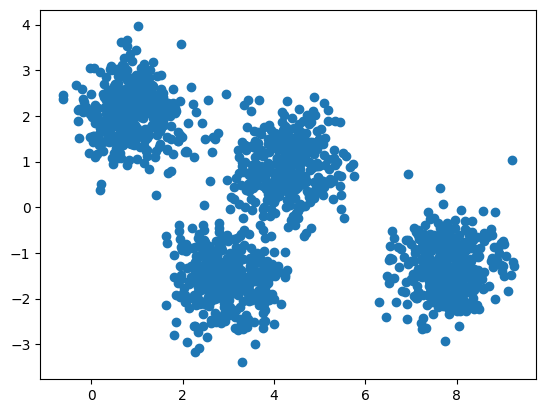

In [20]:
plt.scatter(data[:, 0], data[:, 1], cmap='viridis')

In [ ]:
from sklearn.metrics import davies_bouldin_score
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(data, labels)
print(f"Davies-Bouldin Index: {db_index}")

In [7]:
data_dim = data.shape[1]
data_dim

2

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

def initialize_parameters(num_components, data_dim):
    means = np.random.rand(num_components, data_dim)
    covariances = np.array([np.eye(data_dim) for _ in range(num_components)])
    weights = np.ones(num_components) / num_components
    return means, covariances, weights

def e_step(data, means, covariances, weights):
    num_components = len(means)
    num_data = len(data)

    probabilities = np.zeros((num_data, num_components))

    for i in range(num_components):
        # Use multivariate_normal.pdf for n-dimensional arrays
        probabilities[:, i] = weights[i] * multivariate_normal.pdf(data, mean=means[i], cov=covariances[i])

    normalization_factor = np.sum(probabilities, axis=1, keepdims=True)
    probabilities /= normalization_factor

    return probabilities

def m_step(data, probabilities):
    num_components = probabilities.shape[1]
    num_data = len(data)
    data_dim = data.shape[1]

    means = np.zeros((num_components, data_dim))
    covariances = np.zeros((num_components, data_dim, data_dim))
    weights = np.zeros(num_components)

    for i in range(num_components):
        means[i] = np.sum(probabilities[:, i, np.newaxis] * data, axis=0) / np.sum(probabilities[:, i])
        covariances[i] = np.dot((data - means[i]).T, (probabilities[:, i, np.newaxis] * (data - means[i]))) / np.sum(probabilities[:, i])
        weights[i] = np.mean(probabilities[:, i])

    return means, covariances, weights

def em_algorithm(data, num_components, num_iterations=100, tol=1e-4):
    data_dim = data.shape[1]

    means, covariances, weights = initialize_parameters(num_components, data_dim)

    for iteration in range(num_iterations):
        # E Step
        probabilities = e_step(data, means, covariances, weights)

        # M Step
        new_means, new_covariances, new_weights = m_step(data, probabilities)

        # Checking for convergence
        if np.allclose(means, new_means, atol=tol) and np.allclose(covariances, new_covariances, atol=tol) and np.allclose(weights, new_weights, atol=tol):
            break

        # Updating parameters for the next iteration
        means, covariances, weights = new_means, new_covariances, new_weights

    return means, covariances, weights


In [12]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.metrics import davies_bouldin_score

def initialize_parameters(num_components, data_dim):
    means = np.random.rand(num_components, data_dim)
    covariances = np.array([np.eye(data_dim) for _ in range(num_components)])
    weights = np.ones(num_components) / num_components
    return means, covariances, weights

def e_step(data, means, covariances, weights):
    num_components = len(means)
    num_data = len(data)

    probabilities = np.zeros((num_data, num_components))

    for i in range(num_components):
        # Use multivariate_normal.pdf for n-dimensional arrays
        probabilities[:, i] = weights[i] * multivariate_normal.pdf(data, mean=means[i], cov=covariances[i])

    normalization_factor = np.sum(probabilities, axis=1, keepdims=True)
    probabilities /= normalization_factor

    return probabilities

def m_step(data, probabilities):
    num_components = probabilities.shape[1]
    num_data = len(data)
    data_dim = data.shape[1]

    means = np.zeros((num_components, data_dim))
    covariances = np.zeros((num_components, data_dim, data_dim))
    weights = np.zeros(num_components)

    for i in range(num_components):
        means[i] = np.sum(probabilities[:, i, np.newaxis] * data, axis=0) / np.sum(probabilities[:, i])
        covariances[i] = np.dot((data - means[i]).T, (probabilities[:, i, np.newaxis] * (data - means[i]))) / np.sum(probabilities[:, i])
        weights[i] = np.mean(probabilities[:, i])

    return means, covariances, weights

def em_algorithm(data, num_components, num_iterations=100, tol=1e-4):
    data_dim = data.shape[1]

    means, covariances, weights = initialize_parameters(num_components, data_dim)

    for iteration in range(num_iterations):
        # E Step
        probabilities = e_step(data, means, covariances, weights)

        # M Step
        new_means, new_covariances, new_weights = m_step(data, probabilities)

        # Checking for convergence
        if np.allclose(means, new_means, atol=tol) and np.allclose(covariances, new_covariances, atol=tol) and np.allclose(weights, new_weights, atol=tol):
            break

        # Updating parameters for the next iteration
        means, covariances, weights = new_means, new_covariances, new_weights

    # Calculate Davis-Bouldin index
    labels = np.argmax(probabilities, axis=1)
    db_index = davies_bouldin_score(data, labels)

    return means, covariances, weights, db_index


In [28]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.metrics import silhouette_score, davies_bouldin_score

def initialize_parameters(num_components, data_dim):
    means = np.random.rand(num_components, data_dim)
    covariances = np.array([np.eye(data_dim) for _ in range(num_components)])
    weights = np.ones(num_components) / num_components
    return means, covariances, weights

def e_step(data, means, covariances, weights):
    num_components = len(means)
    num_data = len(data)

    probabilities = np.zeros((num_data, num_components))

    for i in range(num_components):
        # Use multivariate_normal.pdf for n-dimensional arrays
        probabilities[:, i] = weights[i] * multivariate_normal.pdf(data, mean=means[i], cov=covariances[i])

    normalization_factor = np.sum(probabilities, axis=1, keepdims=True)
    probabilities /= normalization_factor

    return probabilities

def m_step(data, probabilities):
    num_components = probabilities.shape[1]
    num_data = len(data)
    data_dim = data.shape[1]

    means = np.zeros((num_components, data_dim))
    covariances = np.zeros((num_components, data_dim, data_dim))
    weights = np.zeros(num_components)

    for i in range(num_components):
        means[i] = np.sum(probabilities[:, i, np.newaxis] * data, axis=0) / np.sum(probabilities[:, i])
        covariances[i] = np.dot((data - means[i]).T, (probabilities[:, i, np.newaxis] * (data - means[i]))) / np.sum(probabilities[:, i])
        weights[i] = np.mean(probabilities[:, i])

    return means, covariances, weights

def em_algorithm(data, num_components, num_iterations=100, tol=1e-4):
    data_dim = data.shape[1]

    means, covariances, weights = initialize_parameters(num_components, data_dim)

    for iteration in range(num_iterations):
        # E Step
        probabilities = e_step(data, means, covariances, weights)

        # M Step
        new_means, new_covariances, new_weights = m_step(data, probabilities)

        # Checking for convergence
        if np.allclose(means, new_means, atol=tol) and np.allclose(covariances, new_covariances, atol=tol) and np.allclose(weights, new_weights, atol=tol):
            break

        # Updating parameters for the next iteration
        means, covariances, weights = new_means, new_covariances, new_weights

    # Calculate Silhouette Score
    labels = np.argmax(probabilities, axis=1)
    silhouette_avg = silhouette_score(data, labels)

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(data, labels)

    return means, covariances, weights, silhouette_avg, db_index


In [42]:
num_components = 4
num_iterations = 100

# Run EM algorithm
result_means, result_covariances, result_weights, silhouette_avg, db_index = em_algorithm(data, num_components, num_iterations)

# Print the results
print("Final means:", result_means)
print("Final covariances:", result_covariances)
print("Final weights:", result_weights)
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)

# Report prior probability for each cluster
for i, weight in enumerate(result_weights):
    print(f"Cluster {i + 1} Prior Probability (Weight): {weight}")


Final means: [[ 5.87440914 -0.1104455 ]
 [ 2.35685679 -1.05955501]
 [ 0.84937369  2.07340457]
 [ 2.9860147  -1.59659181]]
Final covariances: [[[ 4.07833140e+00 -2.26997702e+00]
  [-2.26997702e+00  1.73928283e+00]]

 [[ 1.23906395e-01 -7.27857715e-02]
  [-7.27857715e-02  1.32669644e-01]]

 [[ 2.66872288e-01  1.73539665e-03]
  [ 1.73539665e-03  3.23162716e-01]]

 [[ 3.27407237e-01  2.35077728e-02]
  [ 2.35077728e-02  3.52760591e-01]]]
Final weights: [0.51650559 0.01940408 0.23343877 0.23065156]
Silhouette Score: 0.3412118896568931
Davies-Bouldin Index: 0.7546183195292877
Cluster 1 Prior Probability (Weight): 0.5165055899074401
Cluster 2 Prior Probability (Weight): 0.019404080686936522
Cluster 3 Prior Probability (Weight): 0.23343876853009424
Cluster 4 Prior Probability (Weight): 0.23065156087552907


In [32]:
import matplotlib.pyplot as plt

def plot_clusters(data, means, covariances, probabilities):
    num_components = len(means)

    for i in range(num_components):
        cluster_points = data[probabilities[:, i] > 0.5]  # Adjust threshold as needed
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

        # Plot ellipses representing covariance matrices
        plot_ellipse(means[i], covariances[i])

    plt.title('Scatter Plot of Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def plot_ellipse(mean, covariance, color='red', label=None):
    eigvalues, eigvectors = np.linalg.eigh(covariance)
    angle = np.degrees(np.arctan2(*eigvectors[:, 0][::-1]))

    width, height = 2 * np.sqrt(5.991 * eigvalues)  # Use 95% confidence interval (chi-square value)
    ellip = plt.matplotlib.patches.Ellipse(mean, width, height, angle, color=color, alpha=0.3, label=label)
    plt.gca().add_patch(ellip)

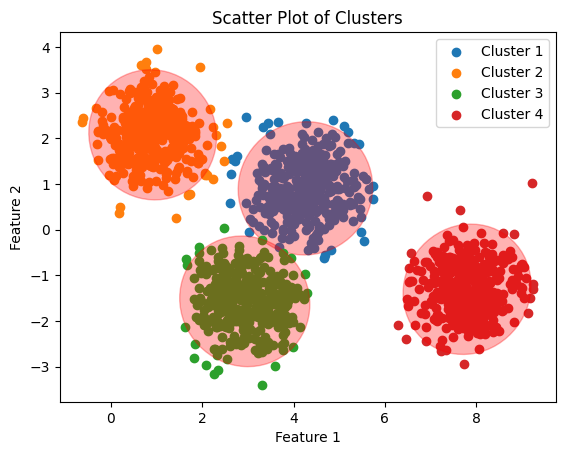

In [ ]:
# Perform E-step to get cluster probabilities
probabilities = e_step(data, result_means, result_covariances, result_weights)

# Plot the clusters
plot_clusters(data, result_means, result_covariances, probabilities)

2. Apply model based clustering on ECG data [UCR Time Series Classification and Clustering website]. Describe the experimental analysis.

In [55]:
data_2_test= pd.read_csv("/content/drive/MyDrive/AML/ASSIGNMENT 1/ECG 200/ECG200_TEST.csv", delimiter='\s+', header=None)
data_2_test

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,1.0,0.425189,1.418599,2.668791,3.298629,2.264554,0.165179,-0.959727,0.282668,0.842850,...,-0.018196,-0.220493,-0.152557,-0.117011,-0.145160,-0.116668,-0.199262,-0.109837,-0.142488,0.098758
1,1.0,0.653929,2.177290,3.644783,2.279203,0.978367,-0.388296,-0.911911,-0.148330,0.305439,...,0.099883,0.141395,-0.239092,0.247424,-0.085150,0.007800,0.407868,-0.194915,0.171107,0.197027
2,1.0,0.404953,0.553996,0.724097,1.449039,2.012616,1.624477,1.204726,1.117511,0.562099,...,1.297938,1.243332,1.463616,1.694916,1.456115,1.570372,1.934584,1.497556,0.812570,0.390639
3,1.0,1.088088,2.011949,2.301733,1.630199,0.636768,-0.140502,0.547954,1.075071,0.896861,...,0.125239,0.071349,0.138197,0.116399,0.131198,0.119412,0.082968,0.151348,0.273915,0.349405
4,-1.0,0.443621,0.947285,1.924084,2.159790,1.499447,0.964508,0.223256,-0.424946,0.121279,...,0.900511,1.278688,2.317878,2.916254,2.211947,2.034753,2.071302,1.254178,1.037879,1.009615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.843834,2.564764,3.343127,2.591811,1.989914,0.441743,0.356408,1.283447,0.820812,...,-0.243969,-0.242760,-0.356488,-0.245672,-0.184878,-0.277344,-0.105103,-0.169774,-0.023764,0.258732
96,1.0,1.398472,2.874771,3.453428,2.897919,1.260043,0.173332,1.289293,1.470054,1.028398,...,-0.406242,-0.525755,-0.439422,-0.398495,-0.366739,-0.399198,-0.401109,-0.371077,-0.451180,-0.100215
97,-1.0,1.113685,1.275951,1.171770,1.554551,2.280557,2.636614,2.514625,2.363170,2.290844,...,0.484357,0.474087,0.323893,0.387200,0.575901,0.426197,0.077527,0.148549,0.479638,0.358700
98,-1.0,2.318208,2.139772,1.794243,2.344508,1.724400,0.431501,-0.464933,-0.542414,-0.830620,...,-0.099292,-0.239948,-0.065850,-0.090294,-0.234900,-0.032727,-0.102668,-0.064539,0.285008,0.470914


In [56]:
data_2_train = pd.read_csv("/content/drive/MyDrive/AML/ASSIGNMENT 1/ECG 200/ECG200_TRAIN.txt", delimiter='\s+', header=None)
data_2_train

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-1.0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,...,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,1.0,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,...,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,-1.0,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,...,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,-1.0,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,...,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,1.0,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,...,-0.097869,-0.136787,-0.340237,-0.089441,-0.080297,-0.192584,-0.304704,-0.454556,0.314590,0.582190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.581277,0.876188,1.042767,1.796120,2.541399,2.246653,1.500387,1.031521,0.382672,...,1.002770,0.907869,0.916457,0.923975,0.767357,0.656223,0.762357,0.501373,-0.333336,-0.524546
96,-1.0,2.689017,2.708703,2.008381,2.235800,1.516982,0.029916,-0.561346,-0.793702,-0.979371,...,-0.136610,-0.072176,-0.082738,-0.138468,-0.120396,-0.089411,-0.243141,-0.119710,0.124042,0.273463
97,-1.0,0.197677,0.455417,0.973110,1.935956,2.259463,1.741341,1.158296,0.418241,-0.071605,...,0.482452,0.325569,0.247991,0.184127,0.050358,0.241988,0.331451,-0.120006,0.042423,0.343293
98,1.0,0.179500,1.038409,1.946421,2.705141,1.670706,-0.101167,-1.578876,-0.750906,0.175310,...,0.324323,0.330489,0.111953,0.448948,0.567132,0.136757,0.444768,0.151050,0.193378,0.451709


In [57]:
df_1 = pd.concat([data_2_test, data_2_train], ignore_index=True)
df_1

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,1.0,0.425189,1.418599,2.668791,3.298629,2.264554,0.165179,-0.959727,0.282668,0.842850,...,-0.018196,-0.220493,-0.152557,-0.117011,-0.145160,-0.116668,-0.199262,-0.109837,-0.142488,0.098758
1,1.0,0.653929,2.177290,3.644783,2.279203,0.978367,-0.388296,-0.911911,-0.148330,0.305439,...,0.099883,0.141395,-0.239092,0.247424,-0.085150,0.007800,0.407868,-0.194915,0.171107,0.197027
2,1.0,0.404953,0.553996,0.724097,1.449039,2.012616,1.624477,1.204726,1.117511,0.562099,...,1.297938,1.243332,1.463616,1.694916,1.456115,1.570372,1.934584,1.497556,0.812570,0.390639
3,1.0,1.088088,2.011949,2.301733,1.630199,0.636768,-0.140502,0.547954,1.075071,0.896861,...,0.125239,0.071349,0.138197,0.116399,0.131198,0.119412,0.082968,0.151348,0.273915,0.349405
4,-1.0,0.443621,0.947285,1.924084,2.159790,1.499447,0.964508,0.223256,-0.424946,0.121279,...,0.900511,1.278688,2.317878,2.916254,2.211947,2.034753,2.071302,1.254178,1.037879,1.009615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.581277,0.876188,1.042767,1.796120,2.541399,2.246653,1.500387,1.031521,0.382672,...,1.002770,0.907869,0.916457,0.923975,0.767357,0.656223,0.762357,0.501373,-0.333336,-0.524546
196,-1.0,2.689017,2.708703,2.008381,2.235800,1.516982,0.029916,-0.561346,-0.793702,-0.979371,...,-0.136610,-0.072176,-0.082738,-0.138468,-0.120396,-0.089411,-0.243141,-0.119710,0.124042,0.273463
197,-1.0,0.197677,0.455417,0.973110,1.935956,2.259463,1.741341,1.158296,0.418241,-0.071605,...,0.482452,0.325569,0.247991,0.184127,0.050358,0.241988,0.331451,-0.120006,0.042423,0.343293
198,1.0,0.179500,1.038409,1.946421,2.705141,1.670706,-0.101167,-1.578876,-0.750906,0.175310,...,0.324323,0.330489,0.111953,0.448948,0.567132,0.136757,0.444768,0.151050,0.193378,0.451709


In [58]:
df = df_1.iloc[:, 1:]
df

,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
0,0.425189,1.418599,2.668791,3.298629,2.264554,0.165179,-0.959727,0.282668,0.842850,0.683458,...,-0.018196,-0.220493,-0.152557,-0.117011,-0.145160,-0.116668,-0.199262,-0.109837,-0.142488,0.098758
1,0.653929,2.177290,3.644783,2.279203,0.978367,-0.388296,-0.911911,-0.148330,0.305439,-0.230098,...,0.099883,0.141395,-0.239092,0.247424,-0.085150,0.007800,0.407868,-0.194915,0.171107,0.197027
2,0.404953,0.553996,0.724097,1.449039,2.012616,1.624477,1.204726,1.117511,0.562099,-0.011556,...,1.297938,1.243332,1.463616,1.694916,1.456115,1.570372,1.934584,1.497556,0.812570,0.390639
3,1.088088,2.011949,2.301733,1.630199,0.636768,-0.140502,0.547954,1.075071,0.896861,1.137943,...,0.125239,0.071349,0.138197,0.116399,0.131198,0.119412,0.082968,0.151348,0.273915,0.349405
4,0.443621,0.947285,1.924084,2.159790,1.499447,0.964508,0.223256,-0.424946,0.121279,0.830197,...,0.900511,1.278688,2.317878,2.916254,2.211947,2.034753,2.071302,1.254178,1.037879,1.009615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.581277,0.876188,1.042767,1.796120,2.541399,2.246653,1.500387,1.031521,0.382672,-0.197561,...,1.002770,0.907869,0.916457,0.923975,0.767357,0.656223,0.762357,0.501373,-0.333336,-0.524546
196,2.689017,2.708703,2.008381,2.235800,1.516982,0.029916,-0.561346,-0.793702,-0.979371,-1.288162,...,-0.136610,-0.072176,-0.082738,-0.138468,-0.120396,-0.089411,-0.243141,-0.119710,0.124042,0.273463
197,0.197677,0.455417,0.973110,1.935956,2.259463,1.741341,1.158296,0.418241,-0.071605,-0.241250,...,0.482452,0.325569,0.247991,0.184127,0.050358,0.241988,0.331451,-0.120006,0.042423,0.343293
198,0.179500,1.038409,1.946421,2.705141,1.670706,-0.101167,-1.578876,-0.750906,0.175310,0.064901,...,0.324323,0.330489,0.111953,0.448948,0.567132,0.136757,0.444768,0.151050,0.193378,0.451709


In [59]:
n_attributes = 96
X = df.iloc[:, 1:n_attributes+1].values
X

array([[ 1.4185988 ,  2.6687913 ,  3.298629  , ..., -0.10983685,
        -0.14248753,  0.09875814],
       [ 2.1772899 ,  3.6447828 ,  2.2792033 , ..., -0.19491519,
         0.17110719,  0.19702731],
       [ 0.55399598,  0.72409707,  1.4490394 , ...,  1.4975555 ,
         0.81257   ,  0.39063926],
       ...,
       [ 0.45541658,  0.97310983,  1.9359564 , ..., -0.1200061 ,
         0.04242264,  0.34329344],
       [ 1.0384092 ,  1.9464212 ,  2.7051409 , ...,  0.15104997,
         0.19337751,  0.45170853],
       [ 0.77605406,  2.181336  ,  3.4403251 , ..., -0.06668896,
        -0.17844792, -0.25605159]])

In [60]:
#Applying PCA for dimensionality Reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[-2.08864412, -3.15330513],
       [-3.21416166, -1.41627931],
       [ 6.46903499,  2.46845871],
       [-1.43942867, -2.01220175],
       [ 5.90893541,  2.42702621],
       [-2.02849598, -2.31344488],
       [ 4.0649022 ,  1.26486873],
       [-2.4277669 , -0.76454045],
       [-1.68359897, -2.57592532],
       [ 7.70921214,  0.39418866],
       [-4.01710207,  1.58668168],
       [-3.51020001,  6.81660081],
       [-1.8436604 ,  5.77513463],
       [ 6.34650254,  2.11711675],
       [ 5.62178616,  1.33581941],
       [ 4.64720688, -0.88500823],
       [-2.9911373 , -1.3412686 ],
       [-1.79823578,  0.02149346],
       [-4.77378296,  4.3187904 ],
       [-4.00377815,  4.30018531],
       [-2.00812586,  8.13872648],
       [-2.8331111 , -2.73020445],
       [-2.79530587, -0.65855417],
       [-2.02825086, -2.59775918],
       [-3.05282457,  6.46480617],
       [-4.5556773 ,  6.64403855],
       [ 5.63901525,  0.13765655],
       [-0.77399703, -0.83793407],
       [-3.89548012,

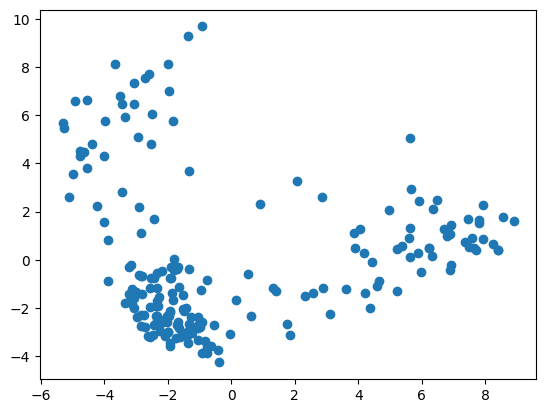

In [61]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')

In [62]:
from sklearn.mixture import GaussianMixture
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_pca)


GaussianMixture(n_components=2, random_state=42)

In [63]:
labels = gmm.predict(X_pca)
labels

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1])

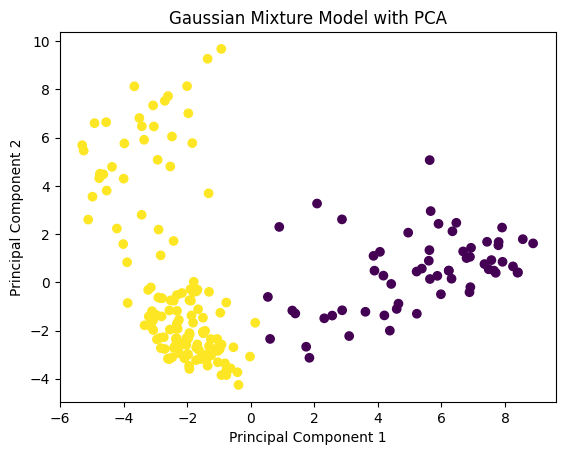

In [64]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c= labels, cmap='viridis')
plt.title('Gaussian Mixture Model with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [65]:
num_components =2
num_iterations = 100

# Run EM algorithm
result_means, result_covariances, result_weights, silhouette_avg, db_index = em_algorithm(X_pca, num_components, num_iterations)

# Print the results
print("Final means:", result_means)
print("Final covariances:", result_covariances)
print("Final weights:", result_weights)
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)

# Report prior probability for each cluster
for i, weight in enumerate(result_weights):
    print(f"Cluster {i + 1} Prior Probability (Weight): {weight}")


Final means: [[ 5.27393261  0.42147431]
 [-2.33002575 -0.18620753]]
Final covariances: [[[ 5.36166881  1.73566914]
  [ 1.73566914  2.50159876]]

 [[ 1.32487249 -2.18273373]
  [-2.18273373 12.53118883]]]
Final weights: [0.30642274 0.69357726]
Silhouette Score: 0.5414958901675945
Davies-Bouldin Index: 0.7152131767645675
Cluster 1 Prior Probability (Weight): 0.30642273924124963
Cluster 2 Prior Probability (Weight): 0.6935772607587503


In [66]:
import matplotlib.pyplot as plt

def plot_clusters(data, means, covariances, probabilities):
    num_components = len(means)

    for i in range(num_components):
        cluster_points = X_pca[probabilities[:, i] > 0.5]  # Adjust threshold as needed
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

        # Plot ellipses representing covariance matrices
        plot_ellipse(means[i], covariances[i])

    plt.title('Scatter Plot of Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def plot_ellipse(mean, covariance, color='red', label=None):
    eigvalues, eigvectors = np.linalg.eigh(covariance)
    angle = np.degrees(np.arctan2(*eigvectors[:, 0][::-1]))

    width, height = 2 * np.sqrt(5.991 * eigvalues)  # Use 95% confidence interval (chi-square value)
    ellip = plt.matplotlib.patches.Ellipse(mean, width, height, angle, color=color, alpha=0.3, label=label)
    plt.gca().add_patch(ellip)

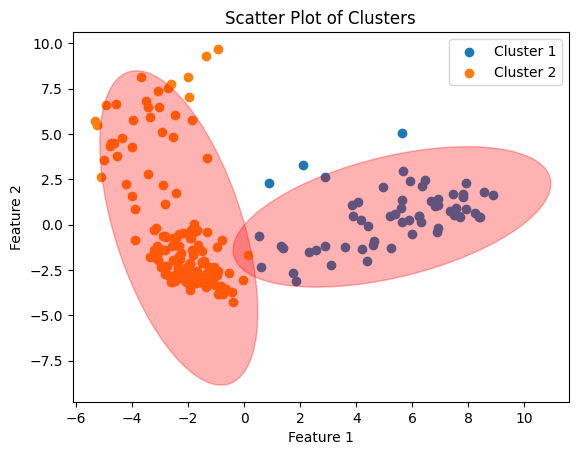

In [67]:
# Perform E-step to get cluster probabilities
probabilities = e_step(X_pca, result_means, result_covariances, result_weights)

# Plot the clusters
plot_clusters(X_pca, result_means, result_covariances, probabilities)